### Problem 1

For the function $f(x)=3x^4 - 4x^3 - 12x^2$

1. Plot the function for $-3\le x\le 3$.
2. Compute local minimums and global minimums of $f(x)$ by hand.
3. Find the minimum of the function using gradient decent method. Try the following initial guess and the learning rate and explain the result.
- Try the initial guess $x_0 = -2$ with the learning rate $10^{-3}$.
- Try the initial guess $x_0 = 1$ with the learning rate $10^{-3}$.
- Try the initial guess $x_0 = 1$ with the learning rate $10^{-1}$.

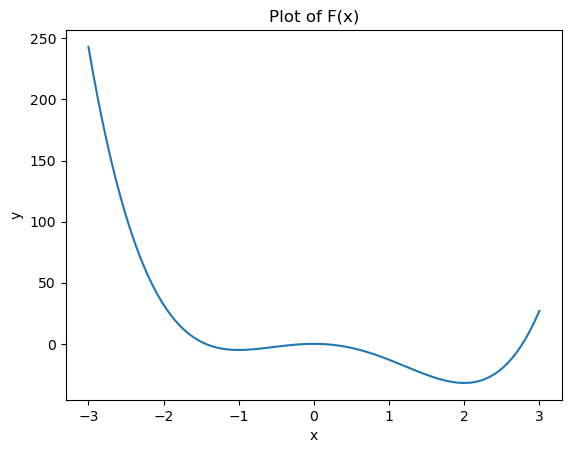

In [1]:
# 1.
import numpy as np
import matplotlib.pyplot as plt

# Define the function to minimize
def f(x):
    return 3*x**4 - 4*x**3 - 12*x**2

x_vals = np.linspace(-3, 3, 100)
y_vals = f(x_vals)
plt.figure()
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of F(x)')
plt.show()

### 2. Local/Global Minimum(s)
$f(x) = 3x^4 - 4x^3 - 12x^2$ \
$ \nabla f(x) = 12x^3 - 12x^2 - 24x $ \
To find the local minimums, let $ \nabla f(x) = 0 $ \
Then $$ 12x^3 - 12x^2 - 24x = 0 $$
$$ x(12x^2 - 12x - 24) = 0 $$
$$ x = 0, \quad 12x^2 - 12x - 24 = 0 $$
\begin{align}
12x^2 + 12x - 24x - 24 &= 0 \\
12x(x + 1) - 24(x + 1) &= 0 \\
(x + 1) = 0, \, (12x - 24) &= 0 \\
x = -1, \quad x = 2
\end{align}

Therefore, the critical points are $ x = -1, 0, 2 $ \
When $ x = -1, \quad f(x) = -5 $ \
When $ x = 0, \quad f(x) = 0 $ \
When $ x = 2, \quad f(x) = -32 $ \
Therefore, \
Local minimumns of $ f(x) : (-1, -5), (2, -32) $ \
Global minimum of $ f(x) : (2, -32). $

In [2]:
# 3.

import numpy as np
import matplotlib.pyplot as plt

# Define the function to minimize
def f(x):
    return 3*x**4 - 4*x**3 - 12*x**2
    
# Define the gradient function
def gradient(x):
    return 12*x**3 - 12*x**2 - 24*x

# Define the gradient descent function
def gradient_descent(start, alpha, num_iters):
    x = np.zeros(num_iters)
    x[0] = start
    for i in range(num_iters-1):
        x[i+1] = x[i] - alpha * gradient(x[i])
    return x

In [3]:
# Set the initial point, learning rate, and number of iterations
num_iters = 100
start = -2 
alpha = 10 ** (-3)
# Run gradient descent
x = gradient_descent(start, alpha, num_iters)

print("Local minimum: ", x[-1])

## Using this initial guess and learning rate results in a local minimum -1.0106 which is very close to one of the local minima i.e.
## (the non-global minimum). This is because our initial point chosen is closer to this local minimum than the global minimum.

Local minimum:  -1.010602718773632


In [4]:
start = 1
alpha = 10 ** (-3)

# Run gradient descent
x = gradient_descent(start, alpha, num_iters)

print("Local minimum: ", x[-1])
## Using this initial guess and learning rate results in a local minimum 1.9976 which is very close to global minimum.
## (the non-global minimum). This happens because the initial point chosen is closer to the actual global minimum.

Local minimum:  1.9976205359064494


In [5]:
start = 1
alpha = 10 ** (-1)

# Run gradient descent
x = gradient_descent(start, alpha, num_iters)

print("Local minimum: ", x[-1])

## Using this initial guess and learning rate results in errors. This is becomes the large learning rate results in the function
## working on invalid x data at some point during the run. 

Local minimum:  nan


C:\Users\bawoyemi\AppData\Local\Temp\ipykernel_30260\1028375433.py:12: RuntimeWarning: overflow encountered in scalar power
  return 12*x**3 - 12*x**2 - 24*x
C:\Users\bawoyemi\AppData\Local\Temp\ipykernel_30260\1028375433.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  return 12*x**3 - 12*x**2 - 24*x


### Problem 2
In class, we use the gradient descent method to compute the solution of $w$ and $b$ in the logistic regression method. Please replace the gradient descent method by the Newton's method and verify that
1. The result of the Newton's method is the same as the result of the gradient descent method. (Hint: print the values of $w$ and $b$ and verify that they are the same.)
2. The Newton's method converges much faster than the gradient descent method. (Hint: plot the results of the Newton's method and the gradient descent method in terms of the number of iterations in the same figure.)

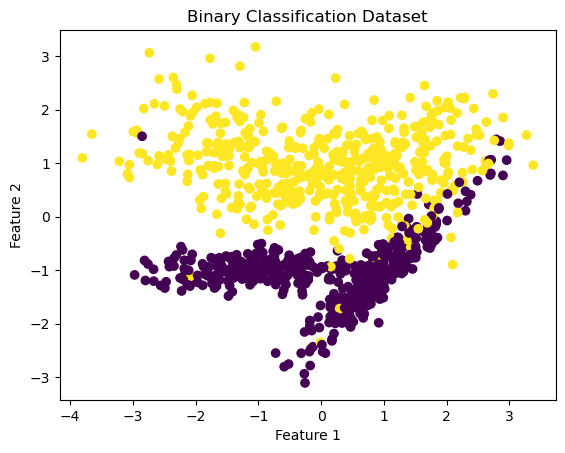

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a random binary classification dataset
X, y = make_classification(
    n_samples=1000, # number of samples
    n_features=2, # number of features
    n_informative=2, # number of useful features
    n_classes=2, # number of classes (or labels)
    n_redundant=0, # number of redundant features
    random_state=0 # fix random seed to get the same result
    )

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

# Add a column of ones to the training set for the bias term
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the gradient of the cost function
def gradient(X, y, w):
    m = X.shape[0]
    h = sigmoid(X.dot(w))
    grad = (1 / m) * X.T.dot(h - y)
    return grad

# Define the Hessian of the cost function
def hessian(X, w):
    m = X.shape[0]
    hess = (1 / m) * X.T.dot(X)
    return hess

# # print (hess.shape, grad.shape)

# Run Newton's method to update the weights
def newton(num_iters):
    w = np.zeros((num_iters, 3))
    for i in range(num_iters - 1):
        grad = gradient(X, y, w[i])
        hess = hessian(X, w[i])
        w[i+1] = w[i] - np.linalg.inv(hess).dot(grad)
    return w

# Print the learned parameters
w_newt = newton(10000)
print("w: ", w_newt[-1])
## Answers are equivalent to Gradient descent's result as seen below.

w:  [-0.52627008  4.15584071  0.70188972]


In [8]:
alpha = 0.01 # Learning rate for gradient descent (GD) 
num_iters = 100000 # Number of iterations

# Initialize the weights for GD to zeros
w_gd = np.zeros((num_iters, 3))

# Run gradient descent
for i in range(num_iters - 1):
    grad_gd = gradient(X, y, w_gd[i])
    w_gd[i + 1] = w_gd[i] - alpha * grad_gd

print("w_gd: ", w_gd[-1])

w_gd:  [-0.52626125  4.15580825  0.70187711]


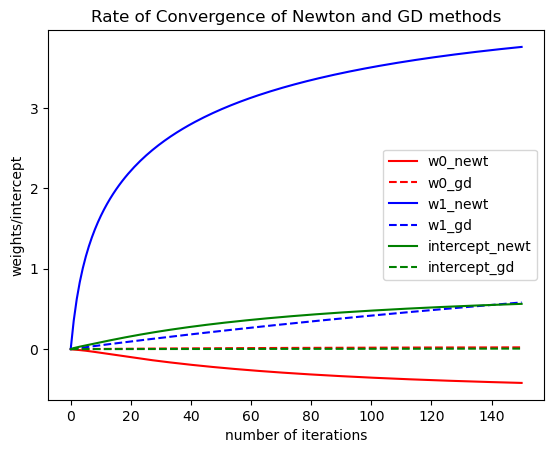

In [16]:
x = np.linspace(0, 150, 150)

plt.figure()
plt.plot(x, w_newt[0:150, 0], '-', color = 'r', label = 'w0_newt')
plt.plot(x, w_gd[0:150, 0], '--', color = 'r', label = 'w0_gd')
plt.plot(x, w_newt[0:150, 1], '-', color = 'b', label = 'w1_newt')
plt.plot(x, w_gd[0:150, 1], '--', color = 'b', label = 'w1_gd')
plt.plot(x, w_newt[0:150, 2], '-', color = 'g', label = 'intercept_newt')
plt.plot(x, w_gd[0:150, 2], '--', color = 'g', label = 'intercept_gd')
plt.xlabel('number of iterations')
plt.ylabel('weights/intercept')
plt.title('Rate of Convergence of Newton and GD methods')
plt.legend()
plt.show()

From the diagram above, we can clearly see that the Newton's method converges much faster to all the weight/intercept values than the gradient descent method.